In [73]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [74]:
p = 1
a = 1
b = 1
N = [5, 10, 20, 50, 100]

In [75]:
def f(x):
    return 2*p**2*math.exp(p*x)
    #return x**2 - x**3

In [76]:
def answer(N):
    C1 = (b + p*a*math.exp(-p) - p*math.exp(p) - p**2*math.exp(p))/(p*math.exp(p) + p*math.exp(-p))
    C2 = a - C1
    u_exact = [0]*(N+1)
    x = np.linspace(0, 1, N+1)
    for i in range(N+1):
        u_exact[i] = C1*math.exp(p*x[i]) + C2*math.exp(-p*x[i]) + p*x[i]*math.exp(p*x[i])
    return u_exact

In [77]:
def progon(N):
    x = np.linspace(0, 1, N+1)
    h = 1/N
    u = [0]*(N+1)
    u[0] = a

    #Определим коэффициенты
    A = 1/h**2
    B = -2/h**2 - p**2
    C = 1/h**2
    G = [0]*N
    for i in range(N):
        G[i] = f(x[i])

    # вычисляем прогоночные коэффициенты: 
    P = [0]*N
    Q = [0]*N
    P[0] = 0
    Q[0] = a
    for i in range(1, N):
        P[i] = -C / (A * P[i-1] + B)
        Q[i] = (G[i] - A * Q[i-1]) / (A*P[i-1] + B)

    # вычисляем u[i]:
    u[N] = (2*b*h - P[N-2]*Q[N-1] - Q[N-2] + 4*Q[N-1]) / (3 + P[N-2]*P[N-1] - 4*P[N-1])

    for i in range(N-1, 0, -1):
        u[i] = P[i]*u[i+1] + Q[i]

    return u

In [78]:
x_1 = np.linspace(0, 1, N[0])
u_1 = progon(N[0] - 1)
x_2 = np.linspace(0, 1, N[1])
u_2 = progon(N[1] - 1)
x_3 = np.linspace(0, 1, N[2])
u_3 = progon(N[2] - 1)
x_4 = np.linspace(0, 1, N[3])
u_4 = progon(N[3] - 1)
x_5 = np.linspace(0, 1, N[4])
u_5 = progon(N[4] - 1)

x_real = np.linspace(0, 1, 10000)
u_real = answer(10000-1)

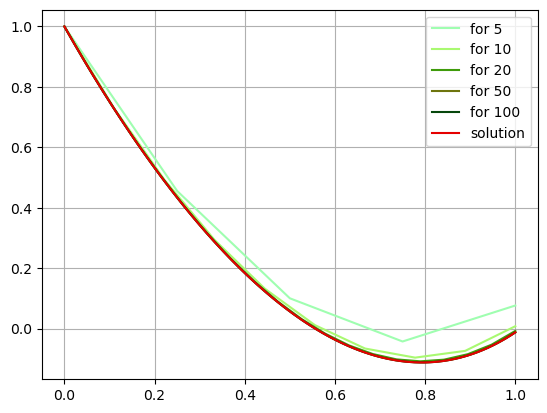

In [79]:
fig = plt.subplots()
plt.plot(x_1,u_1, 'xkcd:mint', label = 'for 5')
plt.plot(x_2,u_2, 'xkcd:spring green', label = 'for 10')
plt.plot(x_3,u_3, 'xkcd:grass green', label = 'for 20')
plt.plot(x_4,u_4, 'xkcd:olive', label = 'for 50')
plt.plot(x_5,u_5, 'xkcd:forest green', label = 'for 100')
plt.plot(x_real,u_real, 'xkcd:red', label = 'solution')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
def error():
    N = [5, 10, 20, 50, 100]
    Err = [0]*5
    for i in range(5):
        x = np.linspace(0, 1, N[i])
        u = progon(N[i])
        u_exact = answer(N[i])
        max_err = 0
        for j in range(N[i]+1):
            err = abs(u[j]-u_exact[j])
            if (err > max_err):
                max_err = err
        Err[i] = max_err    
        print(N[i], '          ' ,max_err) 
    
    print("Порядок сходимости: ", math.log2(Err[0]/Err[1]))
    print("Порядок сходимости: ", math.log2(Err[1]/Err[2]))
    print("Порядок сходимости: ", math.log2(Err[2]/Err[3]))
    print("Порядок сходимости: ", math.log2(Err[3]/Err[4]))  
    
    plt.plot(N, Err, color='red')
    plt.grid() 
    plt.show()

5            0.06015646594964217
10            0.01677197812414702
20            0.004428561032940549
50            0.0007323047367001432
100            0.00018510441785848063
Порядок сходимости:  1.8426669610001767
Порядок сходимости:  1.9211429467222554
Порядок сходимости:  2.5963219691060098
Порядок сходимости:  1.984104799325003


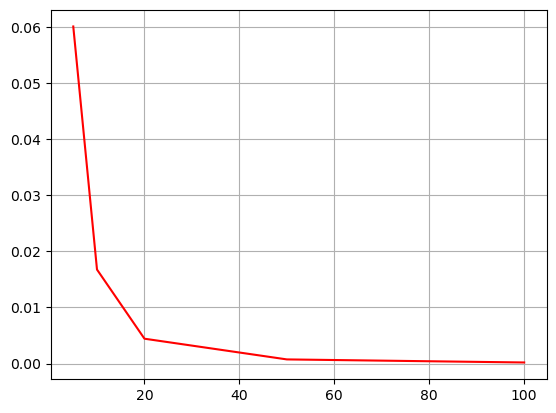

In [85]:
error()